In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.shape

(891, 12)

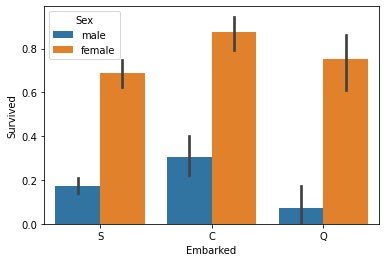

In [7]:
sns.barplot(x='Embarked',y='Survived',hue = 'Sex',data = train)
plt.show()

In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
def mod_age(df):
    df.Age = df.Age.fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age = categories
    return df

In [10]:
def mod_cabins(df):
    df.Cabin = df.Cabin.fillna('N')
    df.Cabin = df.Cabin.apply(lambda x: x[0])
    return df

In [11]:
def mod_fares(df):
    df.Fare = df.Fare.fillna(-0.5)
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    categories = pd.cut(df.Fare, bins, labels=group_names)
    df.Fare = categories
    return df

In [12]:
def format_name(df):
    df['Lname'] = df.Name.apply(lambda x: x.split(' ')[0])
    df['NamePrefix'] = df.Name.apply(lambda x: x.split(' ')[1])
    return df

In [13]:
def drop_features(df):
    return df.drop(['Ticket', 'Name', 'Embarked'], axis=1)

In [14]:
def transform_features(df):
    df = mod_age(df)
    df = mod_cabins(df)
    df = mod_fares(df)
    df = format_name(df)
    df = drop_features(df)
    return df

In [15]:
train = transform_features(train)

In [16]:
test = transform_features(test)

Encoding Features

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
def encode_features(train_df,test_df):
    features = ['Fare', 'Cabin', 'Age', 'Sex', 'Lname', 'NamePrefix']
    df = pd.concat([train_df[features],test_df[features]])
    
    for feature in features:
        encoder = LabelEncoder()
        encoder = encoder.fit(df[feature])
        train_df[feature] = encoder.transform(train_df[feature])
        test_df[feature] = encoder.transform(test_df[feature])
    return train_df,test_df

train,test = encode_features(train,test)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X,y = train.drop(['Survived','PassengerId'],axis = 1),train['Survived']

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

lets fit and tune our data

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,accuracy_score,confusion_matrix

In [23]:
clf = RandomForestClassifier()

In [24]:
param_dist = {'n_estimators' : [4,6,8],
             'max_features' : ['log2','sqrt','auto'],
             'criterion':['gini','entropy'],
             'max_depth':[2,3,5,7,10],
             'min_samples_split':[2,3,5],
             'min_samples_leaf':[1,5,8]}

In [25]:
scorer = make_scorer(accuracy_score)

In [26]:
grid = GridSearchCV(clf,param_dist,scoring = scorer)
grid = grid.fit(X_train,y_train)

In [27]:
clf = grid.best_estimator_

In [28]:
print(grid.best_estimator_)

RandomForestClassifier(max_depth=5, min_samples_split=3, n_estimators=8)


In [29]:
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_split=3, n_estimators=8)

In [30]:
y_pred = clf.predict(X_test)


In [31]:
print(accuracy_score(y_test,y_pred))

0.7985074626865671


In [32]:
print(confusion_matrix(y_test,y_pred))

[[137  20]
 [ 34  77]]


In [33]:
from sklearn.tree import DecisionTreeRegressor

In [80]:
dt = DecisionTreeRegressor()


In [81]:
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [82]:
pred = dt.predict(X_test)

In [83]:
print(accuracy_score(y_test,pred))

0.7723880597014925


In [34]:
pid = test['PassengerId']
predictions = clf.predict(test.drop('PassengerId', axis=1))
output = pd.DataFrame({ 'PassengerId' : pid, 'Survived': predictions})